In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/notebook-01_eda.csv')
data.head()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,...,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Bleached,Term_Type
0,2501,10324336,23.163,-82.5260,Atlantic,8519.23,Exposed,0.0287,49.90,15,...,1.09,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,1,Neutral
1,3467,10324754,-17.575,-149.7833,Pacific,1431.62,Exposed,0.0262,51.20,15,...,0.93,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,1,Neutral
2,1794,10323866,18.369,-64.5640,Atlantic,182.33,Exposed,0.0429,61.52,15,...,1.31,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,1,La Niña
3,8647,10328028,17.760,-64.5680,Atlantic,313.13,Exposed,0.0424,65.39,15,...,0.94,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,1,La Niña
4,8648,10328029,17.769,-64.5830,Atlantic,792.00,Exposed,0.0424,65.39,15,...,1.33,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,1,La Niña


In [3]:
data.shape

(32678, 49)

In [4]:
data = data.drop_duplicates()

In [5]:
data.shape

(21518, 49)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21518 entries, 0 to 32677
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                21518 non-null  int64  
 1   Sample_ID                              21518 non-null  int64  
 2   Latitude_Degrees                       21518 non-null  float64
 3   Longitude_Degrees                      21518 non-null  float64
 4   Ocean_Name                             21518 non-null  object 
 5   Distance_to_Shore                      21518 non-null  float64
 6   Exposure                               21518 non-null  object 
 7   Turbidity                              21518 non-null  float64
 8   Cyclone_Frequency                      21518 non-null  float64
 9   Date_Day                               21518 non-null  int64  
 10  Date_Month                             21518 non-null  int64  
 11  Date_Ye

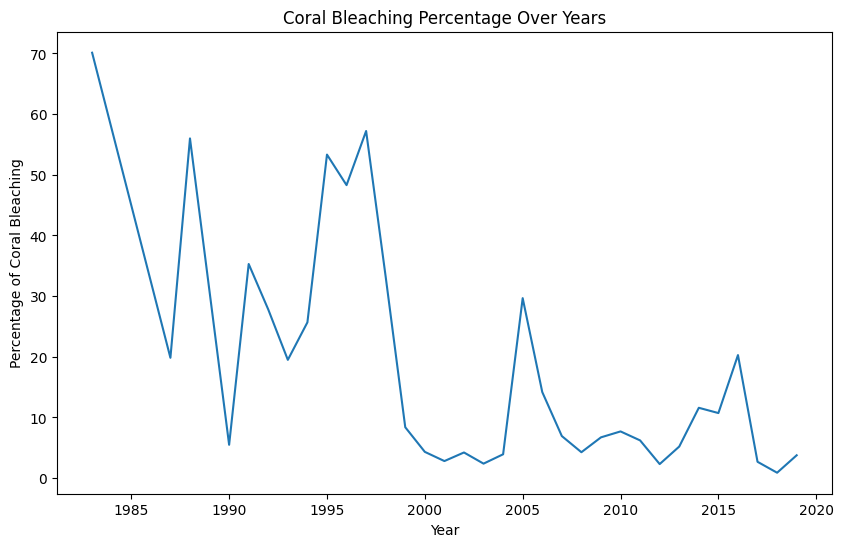

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date_Year', y='Percent_Bleaching', errorbar=None)
plt.title('Coral Bleaching Percentage Over Years')
plt.ylabel('Percentage of Coral Bleaching')
plt.xlabel('Year')
plt.show()

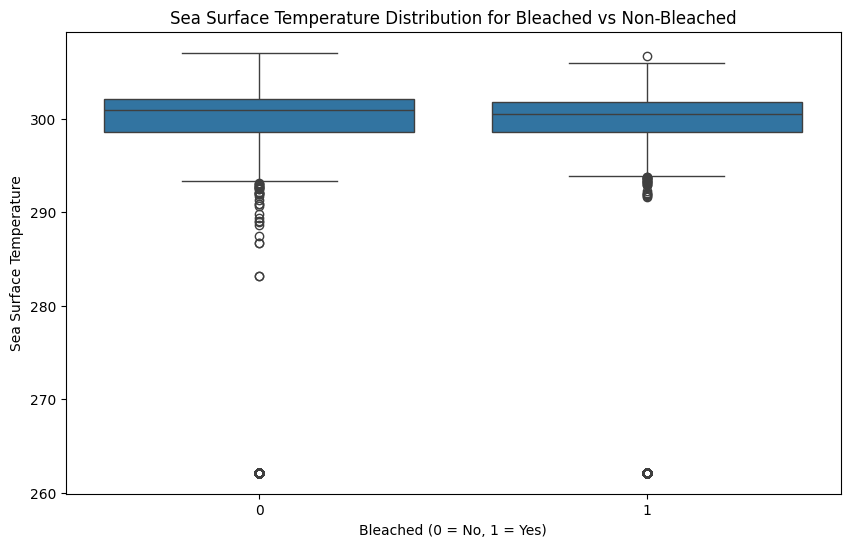

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bleached', y='ClimSST', data=data)
plt.title('Sea Surface Temperature Distribution for Bleached vs Non-Bleached')
plt.xlabel('Bleached (0 = No, 1 = Yes)')
plt.ylabel('Sea Surface Temperature')
plt.show()

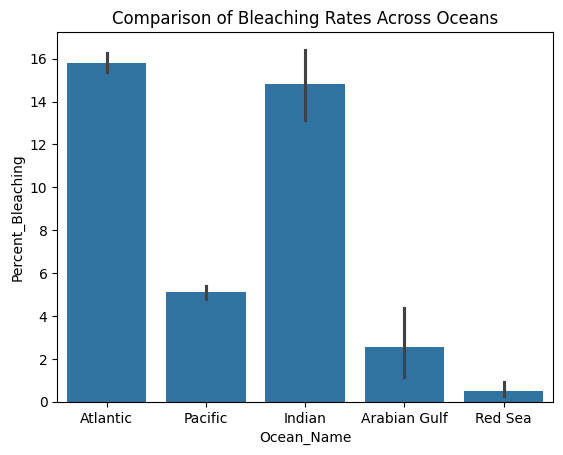

In [9]:
sns.barplot(x='Ocean_Name', y='Percent_Bleaching', data=data)
plt.title('Comparison of Bleaching Rates Across Oceans')
plt.show()

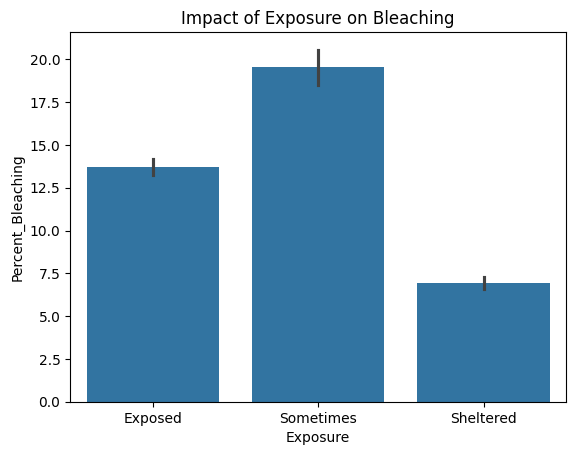

In [10]:
sns.barplot(x='Exposure', y='Percent_Bleaching', data=data)
plt.title('Impact of Exposure on Bleaching')
plt.show()

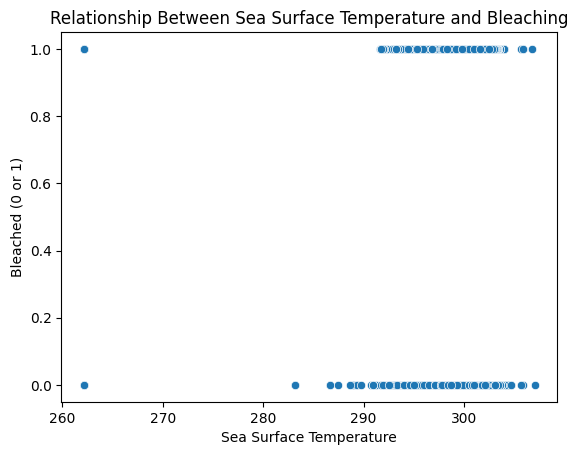

In [11]:
sns.scatterplot(data=data, x='ClimSST', y='Bleached')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Bleached (0 or 1)')
plt.title('Relationship Between Sea Surface Temperature and Bleaching')
plt.show()

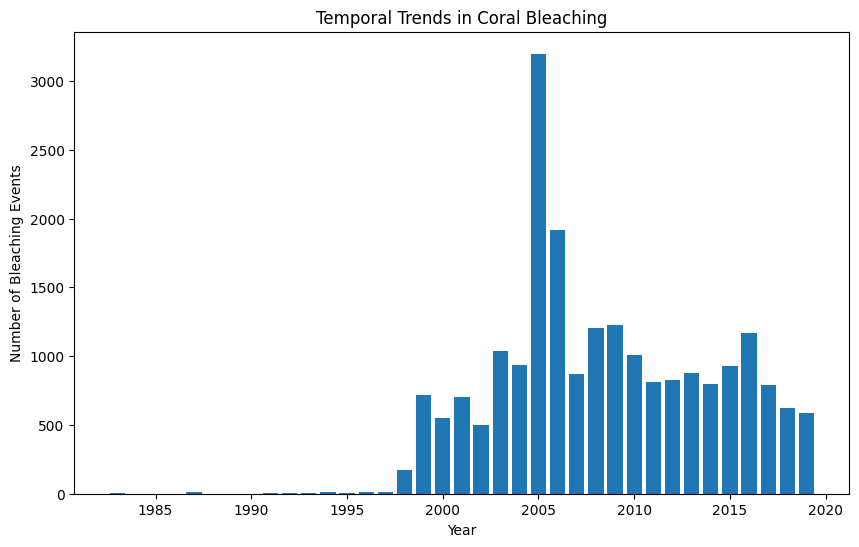

In [12]:
# Count the number of bleaching events per year
data['Date_Year'] = data['Date_Year'].astype(int)
yearly_counts = data['Date_Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Bleaching Events')
plt.title('Temporal Trends in Coral Bleaching')
plt.show()

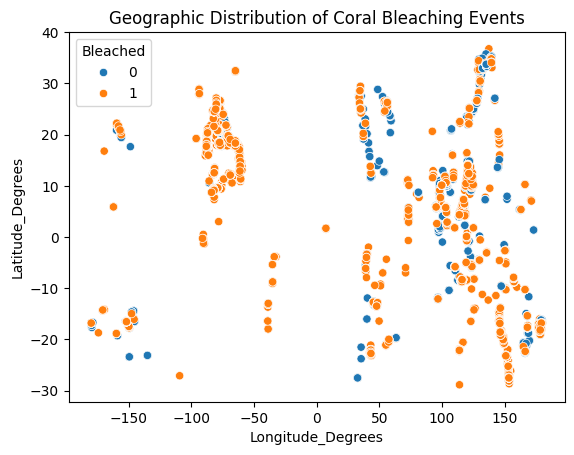

In [13]:
sns.scatterplot(data=data, x='Longitude_Degrees', y='Latitude_Degrees', hue='Bleached')
plt.title('Geographic Distribution of Coral Bleaching Events')
plt.show()

C:\Users\91790\AppData\Local\Temp\ipykernel_18092\600179502.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


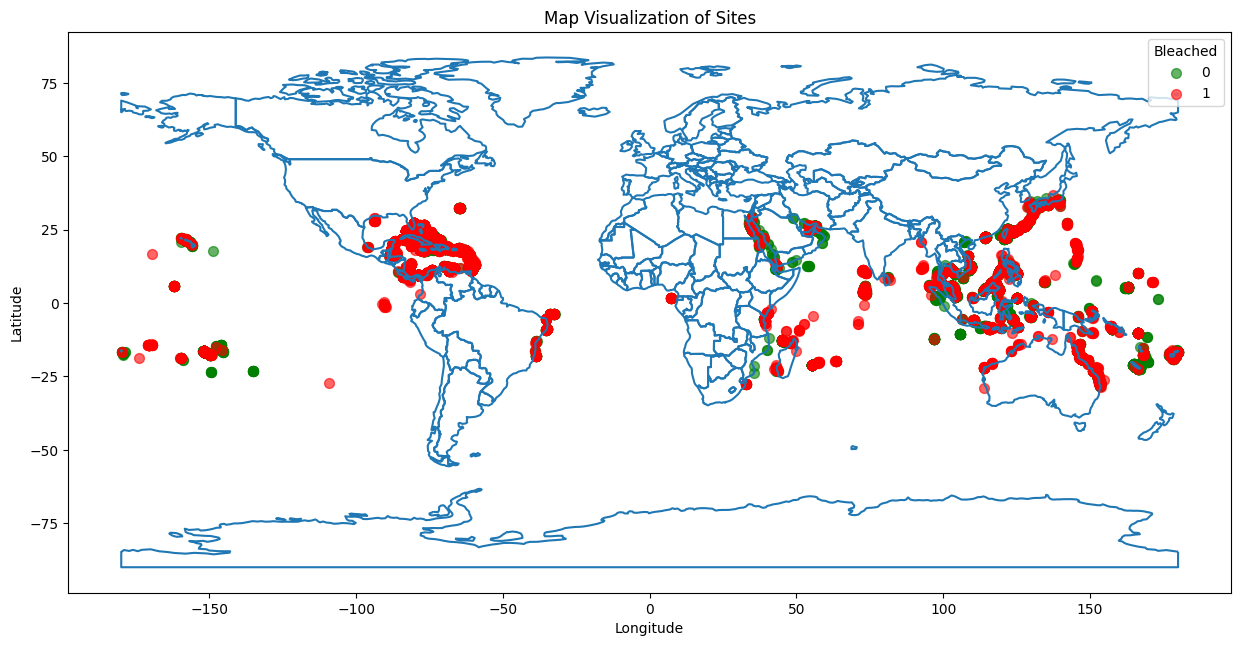

In [14]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.Longitude_Degrees, data.Latitude_Degrees)
)

color_dict = {
    0: 'green',
    1: 'red',

}


fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)

for ocean, color in color_dict.items():
    subset = gdf[gdf['Bleached'] == ocean]
    subset.plot(ax=ax, markersize=50, color=color, label=ocean, alpha=0.6)


plt.title('Map Visualization of Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Bleached')
plt.show()

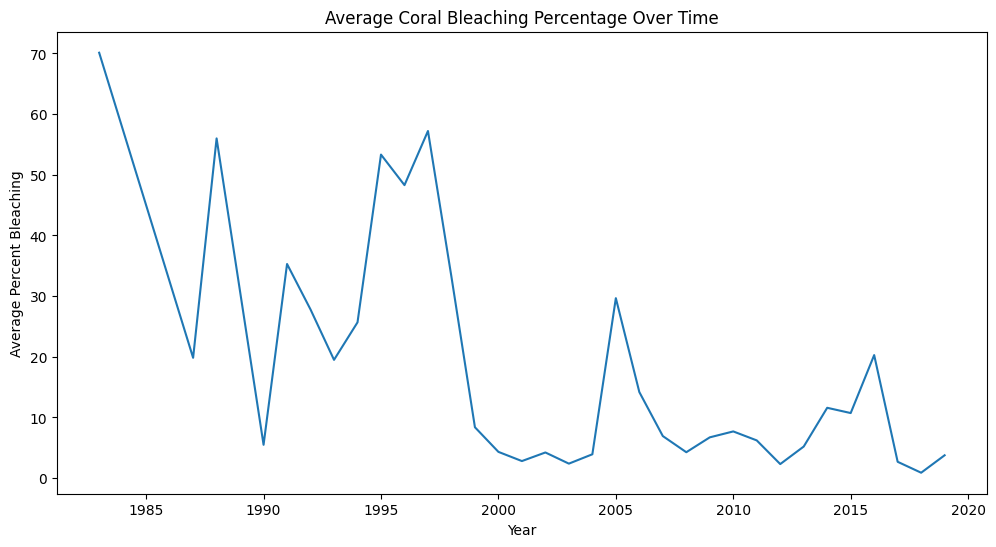

In [16]:
plt.figure(figsize=(12, 6))
yearly_bleaching = data.groupby('Date_Year')['Percent_Bleaching'].mean()
sns.lineplot(x=yearly_bleaching.index, y=yearly_bleaching.values)
plt.title('Average Coral Bleaching Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Percent Bleaching')
plt.show()

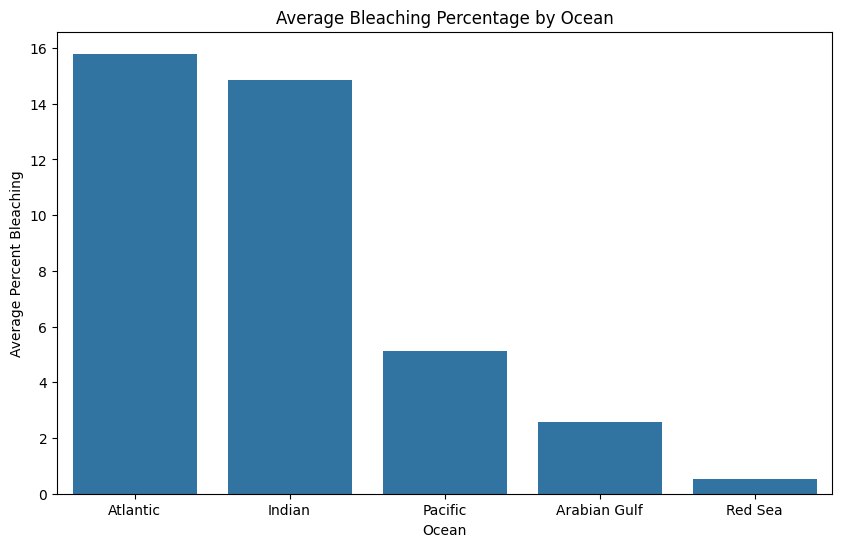

In [19]:
plt.figure(figsize=(10, 6))
ocean_bleaching = data.groupby('Ocean_Name')['Percent_Bleaching'].mean().sort_values(ascending=False)
sns.barplot(x=ocean_bleaching.index, y=ocean_bleaching.values)
plt.title('Average Bleaching Percentage by Ocean')
plt.xlabel('Ocean')
plt.ylabel('Average Percent Bleaching')
# plt.xticks(rotation=45)
plt.show()

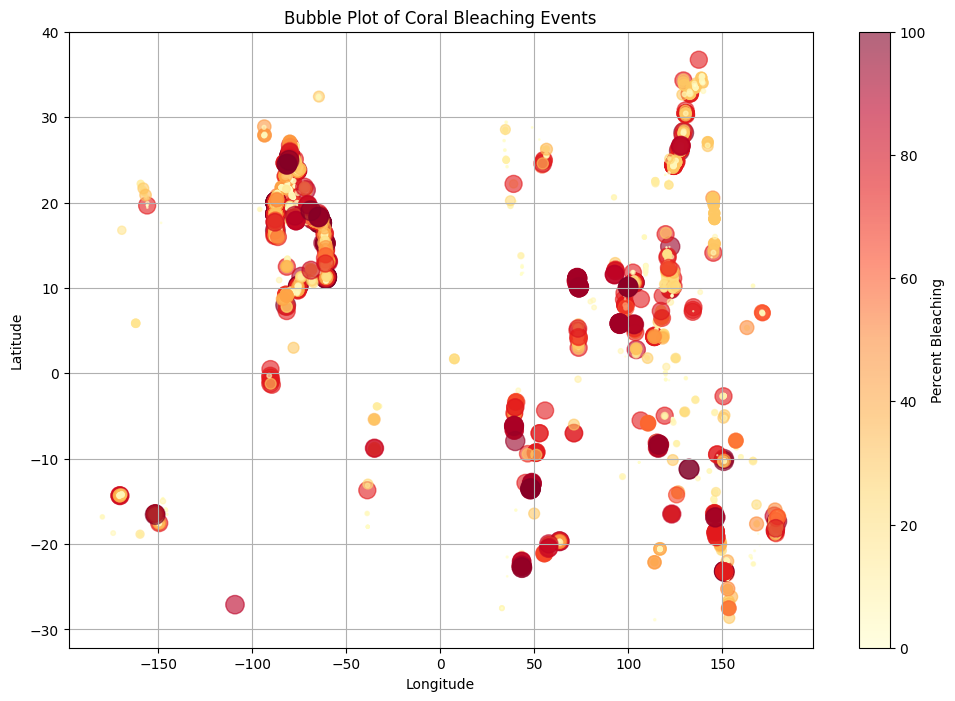

In [20]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['Longitude_Degrees'], data['Latitude_Degrees'], 
                      s=data['Percent_Bleaching']*2, 
                      c=data['Percent_Bleaching'],
                      cmap='YlOrRd', 
                      alpha=0.6)

plt.colorbar(scatter, label='Percent Bleaching')
plt.title('Bubble Plot of Coral Bleaching Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

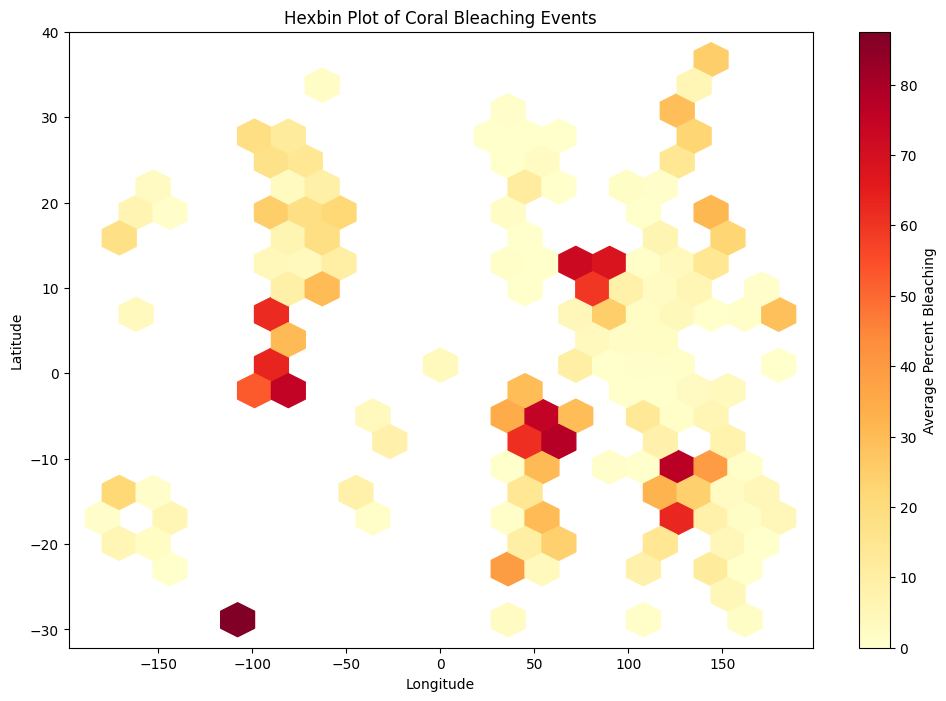

In [21]:
plt.figure(figsize=(12, 8))
plt.hexbin(data['Longitude_Degrees'], data['Latitude_Degrees'], C=data['Percent_Bleaching'], 
           gridsize=20, cmap='YlOrRd')
plt.colorbar(label='Average Percent Bleaching')
plt.title('Hexbin Plot of Coral Bleaching Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


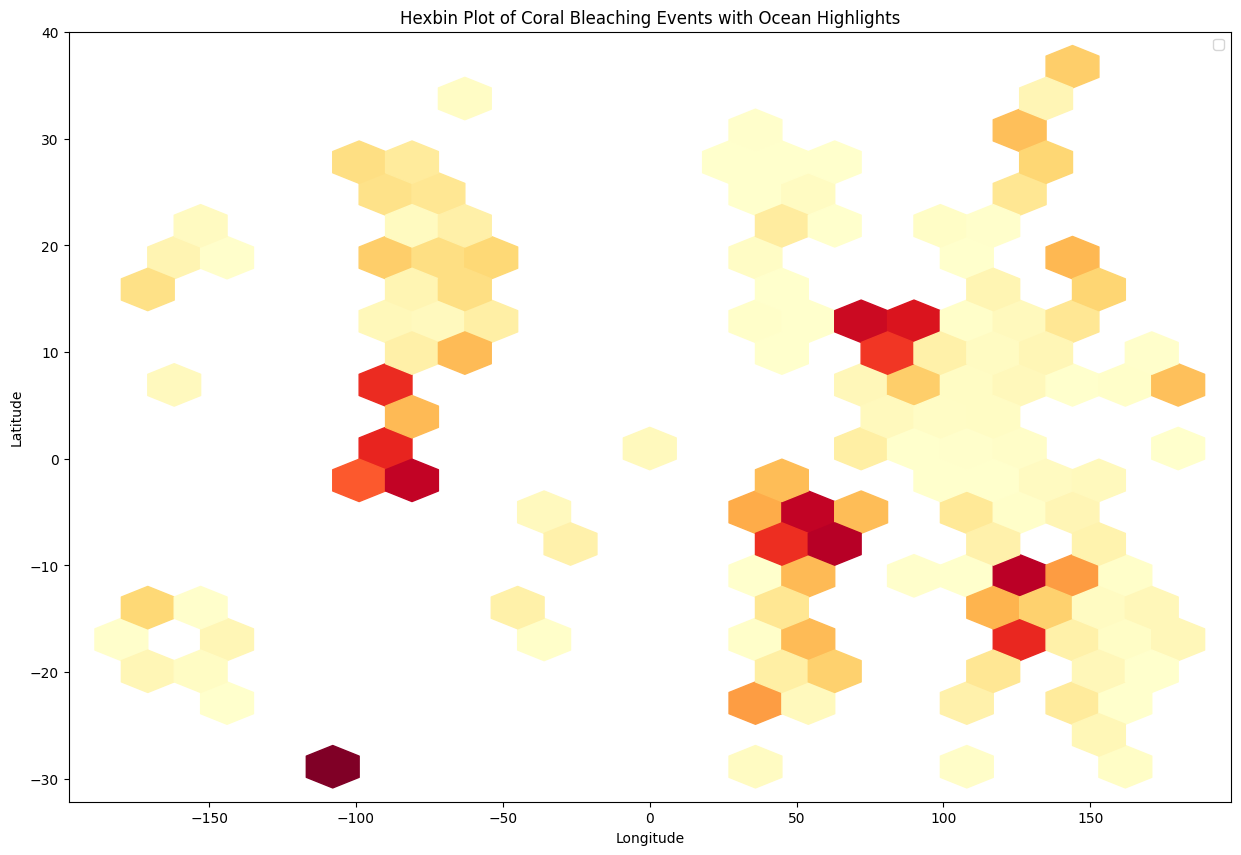

In [22]:
plt.figure(figsize=(15, 10))
plt.hexbin(data['Longitude_Degrees'], data['Latitude_Degrees'], C=data['Percent_Bleaching'], 
           gridsize=20, cmap='YlOrRd')
# plt.colorbar(label='Average Percent Bleaching')
# plt.title('Hexbin Plot of Coral Bleaching Events')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

# Add a rectangle for each region
# Pacific Ocean

pacific = plt.Rectangle((-180, -30), 70, 60, linewidth=2, edgecolor='blue', facecolor='none', label='Pacific Ocean')
ax.add_patch(pacific)

# Red Sea
red_sea = plt.Rectangle((34, 12), 10, 18, linewidth=2, edgecolor='green', facecolor='none', label='Red Sea')
ax.add_patch(red_sea)

# Arabian Gulf
arabian_gulf = plt.Rectangle((48, 24), 8, 6, linewidth=2, edgecolor='purple', facecolor='none', label='Arabian Gulf')
ax.add_patch(arabian_gulf)

# Atlantic Ocean
atlantic = plt.Rectangle((-80, -30), 60, 60, linewidth=2, edgecolor='red', facecolor='none', label='Atlantic Ocean')
ax.add_patch(atlantic)

# Indian Ocean
indian = plt.Rectangle((40, -30), 60, 50, linewidth=2, edgecolor='orange', facecolor='none', label='Indian Ocean')
ax.add_patch(indian)

# Show the plot with legends
plt.legend(loc='upper right')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of Coral Bleaching Events with Ocean Highlights")
plt.show()

C:\Users\91790\AppData\Local\Temp\ipykernel_2876\2813902224.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Not Bleached', 'Bleached'])


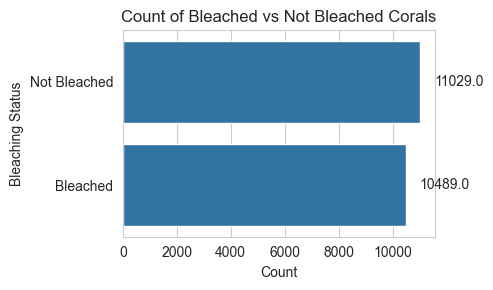

In [ ]:
plt.figure(figsize=(5, 3))  # Increase the width by adjusting the first value
ax = sns.countplot(y='Bleached', data=data)  # Use 'y' instead of 'x' for a horizontal plot

# Customize the plot
plt.title('Count of Bleached vs Not Bleached Corals')
plt.xlabel('Count')
plt.ylabel('Bleaching Status')

# Replace y-axis labels
ax.set_yticklabels(['Not Bleached', 'Bleached'])

# Add count labels on the side of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points')

# Enhance visual appeal
sns.set_style("whitegrid")
plt.tight_layout()

plt.show()

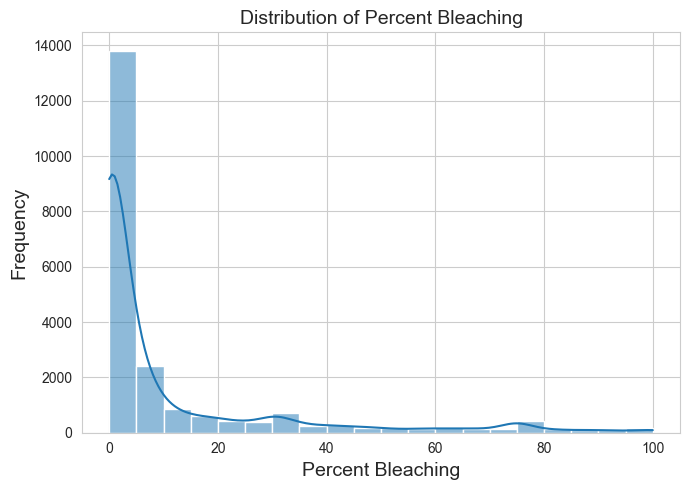

In [ ]:
plt.figure(figsize=(7, 5))

# Increase the binwidth to make bars wider
sns.histplot(data=data, x='Percent_Bleaching', kde=True, binwidth=5)  # Adjust binwidth as needed

plt.title('Distribution of Percent Bleaching', fontsize = 14)
plt.xlabel('Percent Bleaching', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.tight_layout()
plt.show()

